In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker as mtick
import seaborn as sns

import numpy as np


df = pd.read_excel('https://query.data.world/s/q4wmftsxzel7vkcyagmzsg2xufeq7q')

top_prods=df.iloc[:20,[1,4,5]].copy()
top_prods.columns=['producer','flexible_format','rigid_format']
top_prods['total']=top_prods.flexible_format + top_prods.rigid_format
top_prods.sort_values(by='total',ascending=True,inplace=True)

top_prods['pct_flexible']=top_prods.flexible_format/top_prods.total
top_prods['pct_rigid']=top_prods.rigid_format/top_prods.total


# Makeover Monday - 5/31/2021
In this Makeover Monday exercise, the data represents the 20 companies responsible for 55% of plastic waste globally.  The original image from [the challenge](https://data.world/makeovermonday/2021w22) is below.

## Original
![original_image](../images/plastic_producers_original.png)

For this visualization, I selected a stacked bar chart to best illustrate the difference scale between each company.  Additionally, we're able to distinguish their production between rigid plastic which is more likely to be recycled and flexible plastic which has a greater chance of becoming waste.

## Revised
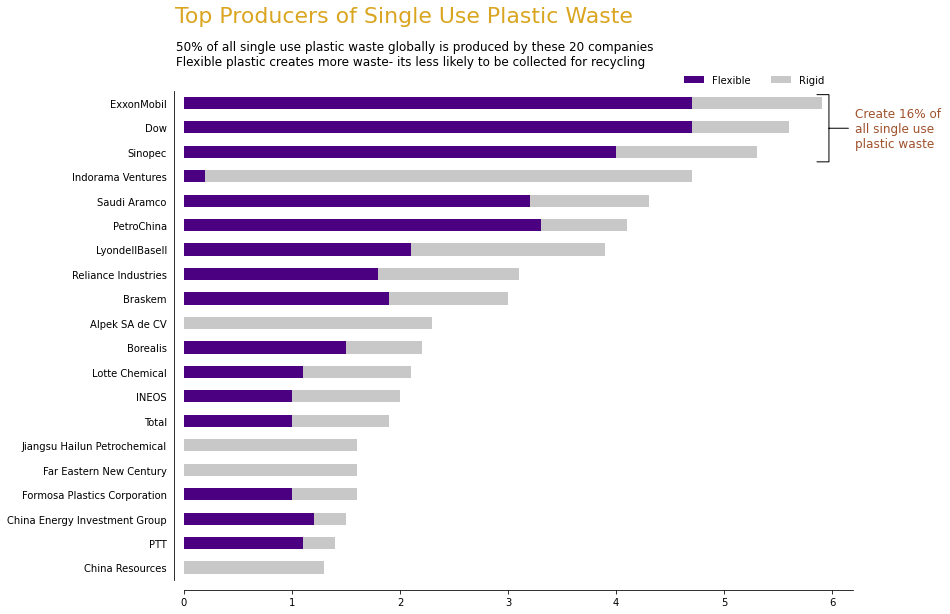

This example uses the following techniques:
- Customizing colors
- Modifying the axes
- Annotating plots


## Create our base chart

To create our base chart, we will use the pandas df.plot() method to build a horizontal stacked bar chart.  We can assign colors to the bars based on the column name by using the color parameter of the method.

```python
# Use the dataframe to create a stacked bar chart
# The parameter color lets us assign bar colors based on the column names
# A brighter color is used to highlight the less favorable rigid format plastic

fig,ax = plt.subplots(figsize=(12,9))
top_prods.loc[:,['producer','flexible_format','rigid_format']].plot.barh(x='producer',stacked=True,ax=ax,rot=0,
                                                                    color={'rigid_format':'#C8C8C8',
                                                                           'flexible_format':'indigo'})
```
### Customize axes borders

There are tick marks next to the label names on the y-axis. We're going to remove these to give the plot a more modern look.

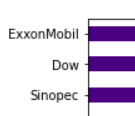

```python
# removes tick marks on the y-axis
ax.tick_params(left=False)

```
We can also increase the focus on our data by hiding the right and top spines. And, we can move the remaining spines outward. The spine position is denoted by the position type (outward, axes or data) and the amount.
- 'outward' places the spine out a fixed number of points from the data
- 'axes' places the spine at the axes coordinate from 0 to 1
- 'data' places the spine at the data coordinate


```python

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Move left and bottom spines outward by 10 points
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))


```
### Customize the legend

The standard legend appears arbitrarily on the plot and has 1 column with a border around it.  This can be further customized by relocating it above the chart and making it horizontally oriented. 

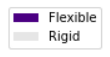


```python
ax.legend(labels=['Flexible','Rigid'], # Relabels values in the legend
           bbox_to_anchor=(.97,1.05), # default is to use the axes coordinates
          frameon=False, # Removes frame from legend
          ncol=2)# Orients legend horizontally
```

### Annotate the plot
In addition to the figure title, this plot uses annotations to add data insights below the title and to highlight the three largest producers of waste.

To indicate where to annotate on the plot we use:
xy: where the annotation will be located on the chart; also the arrow location
xytext: indicates the placement of the text if different
xycoords: notes how the coordinates are determined. I chose figure fraction, but all options are below:
- 'data': uses the data points
- 'figure points'   : points from the lower left corner of the figure
- 'figure pixels'   : pixels from the lower left corner of the figure
- 'figure fraction' : (0, 0) represents the lower left of figure and (1, 1) is upper right - uses float coordinates
- 'axes points'     : points from lower left corner of axes
- 'axes pixels'     : pixels from lower left corner of axes
- 'axes fraction'   : (0, 0) is lower left of axes and (1, 1) is upper right
- 'offset points'   : Offset (in points) from the xy value
- 'offset pixels'   : Offset (in pixels) from the xy value



```python

# Adds a title to the figure
fig.suptitle('Top Producers of Single Use Plastic Waste',
             x=0.38, y=1.01,size='22', color='goldenrod')

# Adds a subtitle below the figure title
ax.annotate('50% of all single use plastic waste globally is produced by these 20 companies\n'
             'Flexible plastic creates more waste- it''s less likely to be collected for recycling',
             xy=(.185,.91), xytext=(.185, .91), xycoords='figure fraction',
            ha='left',va='center',color='black',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"))

# adds an annotation to the horizontal bars
ax.annotate('Create 16% of \nall single use\nplastic waste',xy=(.87,.79), xytext=(.9, .79), 
            xycoords='figure fraction',
            ha='left',va='center',color='sienna',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=1.0', lw=1))

# remove y axis label
ax.set_ylabel('')

```


In [ ]:
# Use the dataframe to create a stacked bar chart
# The parameter color lets us assign bar colors based on the column names
# A brighter color is used to highlight the less favorable rigid format plastic

fig,ax = plt.subplots(figsize=(12,9))
top_prods.loc[:,['producer','flexible_format','rigid_format']].plot.barh(x='producer',stacked=True,ax=ax,rot=0,
                                                                    color={'rigid_format':'#c8c8c8',
                                                                           'flexible_format':'indigo'})

# removes tick marks on the y-axis
ax.tick_params(left=False)


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Move left and bottom spines outward by 10 points
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

ax.legend(labels=['Flexible','Rigid'], # Relabels values in the legend
           bbox_to_anchor=(.97,1.05), # default is to use the axes coordinates
          frameon=False, # Removes frame from legend
          ncol=2)# Orients legend horizontally

# Adds a title to the figure
fig.suptitle('Top Producers of Single Use Plastic Waste',
             x=0.38, y=1.01,size='22', color='goldenrod')

# Adds a subtitle below the figure title
ax.annotate('50% of all single use plastic waste globally is produced by these 20 companies\n'
             'Flexible plastic creates more waste- it''s less likely to be collected for recycling',
             xy=(.185,.91), xytext=(.185, .91), xycoords='figure fraction',
            ha='left',va='center',color='black',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"))

# adds an annotation to the horizontal bars
ax.annotate('Create 16% of \nall single use\nplastic waste',xy=(.87,.79), xytext=(.9, .79), 
            xycoords='figure fraction',
            ha='left',va='center',color='sienna',size='12',
            bbox=dict(pad=5, facecolor="none", edgecolor="none"),
            arrowprops=dict(arrowstyle='-[, widthB=2.8, lengthB=1.0', lw=1))

# remove y axis label
ax.set_ylabel('')